### Importing the necessary dependencies:

In [1]:
import pandas as pd
import numpy as np

In [48]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
phonation_train=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/PhonationData/phonationfeaturesst_seg_dev.csv')
phonation_test=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/PhonationData/phonationfeaturesst_seg_test.csv')

### Preprocessing training data:

In [4]:
phonation_train.head(3)

,subject,avg DF0,avg DDF0,avg Jitter,avg Shimmer,avg apq,avg ppq,avg logE,std DF0,std DDF0,...,skewness ppq,skewness logE,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis apq,kurtosis ppq,kurtosis logE,Group
0,300_P_0.wav,-0.495307,-0.018538,2.687291,4.952022,27.039422,3.304526,-20.051778,14.054193,19.669178,...,2.155216,-0.245601,14.129969,8.746996,16.117512,15.020170,11.444343,4.176683,-0.450599,HC
1,300_P_1.wav,-0.254046,0.010848,1.919633,5.594996,13.878449,1.908758,-14.256003,8.237100,13.521247,...,4.650630,-0.443161,46.655725,30.354837,51.932924,5.046667,0.646848,23.505090,-0.487237,HC
2,300_P_10.wav,-0.206516,-0.012714,2.282983,5.228452,14.449815,2.291457,-14.765719,11.486531,16.360935,...,3.467606,-0.876630,31.587241,17.874929,35.549297,8.486273,2.705997,12.780650,1.440022,HC


In [5]:
phonation_train.isnull().sum()

subject             0
avg DF0             0
avg DDF0            0
avg Jitter          0
avg Shimmer         0
avg apq             0
avg ppq             0
avg logE            0
std DF0             0
std DDF0            0
std Jitter          0
std Shimmer         0
std apq             0
std ppq             0
std logE            0
skewness DF0        0
skewness DDF0       0
skewness Jitter     0
skewness Shimmer    0
skewness apq        0
skewness ppq        0
skewness logE       0
kurtosis DF0        0
kurtosis DDF0       0
kurtosis Jitter     0
kurtosis Shimmer    0
kurtosis apq        0
kurtosis ppq        0
kurtosis logE       0
Group               0
dtype: int64

__note: 30 columns: 28 features(X), 1 target label(Y) and several null values__

#### 1. Checking if the classes have a balanced amount of samples:

In [6]:
#replace string values to 0s & 1s in target column
phonation_train.replace({'Group':{"HC":0,"DP":1}},inplace=True)

In [7]:
val_count=phonation_train.groupby(['Group'])['Group'].count()
print(val_count)

Group
0    3878
1    1145
Name: Group, dtype: int64


In [19]:
df1=phonation_train[phonation_train['Group']==1]
df2=phonation_train[phonation_train['Group']!=1]
df_upsampled=resample(df1,random_state=42,n_samples=3878,replace=True)
ph_train_upsampled=pd.concat([df_upsampled,df2])
#ph_train_upsampled.reset_index(inplace=True)

In [20]:
val_count=df_train_upsampled.groupby(['Group'])['Group'].count()
print(val_count)

#### 2. Replacing null values with 0:

In [21]:
ph_train_upsampled=ph_train_upsampled.fillna(0)

In [22]:
ph_train_upsampled.isnull().sum()

subject             0
avg DF0             0
avg DDF0            0
avg Jitter          0
avg Shimmer         0
avg apq             0
avg ppq             0
avg logE            0
std DF0             0
std DDF0            0
std Jitter          0
std Shimmer         0
std apq             0
std ppq             0
std logE            0
skewness DF0        0
skewness DDF0       0
skewness Jitter     0
skewness Shimmer    0
skewness apq        0
skewness ppq        0
skewness logE       0
kurtosis DF0        0
kurtosis DDF0       0
kurtosis Jitter     0
kurtosis Shimmer    0
kurtosis apq        0
kurtosis ppq        0
kurtosis logE       0
Group               0
dtype: int64

#### 3. Obtaining X & Y values:

In [23]:
X=ph_train_upsampled.drop(['subject','Group'],axis=1)
Y=ph_train_upsampled['Group']

In [24]:
X.head()

,avg DF0,avg DDF0,avg Jitter,avg Shimmer,avg apq,avg ppq,avg logE,std DF0,std DDF0,std Jitter,...,skewness apq,skewness ppq,skewness logE,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis apq,kurtosis ppq,kurtosis logE
4956,-0.111660,0.005250,2.326836,5.872792,21.540270,1.929178,-18.341934,6.058761,10.340854,3.561550,...,1.211855,3.742778,-0.632790,11.918919,11.981419,15.427097,13.306120,0.809769,19.064513,1.159773
3968,-0.222149,-0.136021,2.958609,5.534993,11.900861,2.611513,-13.805911,7.130600,11.784362,4.404986,...,1.045674,2.243362,-0.282039,9.626871,6.169113,12.377013,2.119209,1.666034,4.892607,-0.523174
4960,0.252192,0.407643,3.778666,8.677302,27.157241,3.414364,-19.036916,11.439147,17.846804,6.022909,...,0.695219,2.183229,-1.152767,8.633508,5.670970,9.994917,7.450253,-0.069727,5.533544,1.888555
4925,-0.080527,0.075943,1.824670,4.949506,23.670618,1.701228,-19.398267,8.832737,13.629499,3.648306,...,0.963565,3.889824,-0.312516,19.857256,26.081720,22.513896,33.381209,-0.102749,18.962717,0.263788
4874,-0.321296,0.283470,4.335770,6.731144,25.003917,5.129785,-19.417525,12.739962,19.905674,5.811292,...,0.690406,1.916771,-0.287712,4.917964,2.370454,5.752403,11.224744,-0.321945,3.985814,-0.285122


#### 4. Normalizing the data:

In [25]:
#checking if normalized data has a mean~0 & standard deviation~1:
print(np.mean(X))
print(np.std(X))

avg DF0             -0.065589
avg DDF0             0.028665
avg Jitter           3.419442
avg Shimmer          6.645988
avg apq             23.518466
avg ppq              4.010365
avg logE           -19.321221
std DF0             14.672440
std DDF0            22.091502
std Jitter           5.846198
std Shimmer          9.969139
std apq             19.377855
std ppq              5.670800
std logE             5.309125
skewness DF0         0.951879
skewness DDF0       -0.529713
skewness Jitter      3.885890
skewness Shimmer     3.020590
skewness apq         1.145057
skewness ppq         2.789369
skewness logE       -0.590715
kurtosis DF0        16.457732
kurtosis DDF0       11.546321
kurtosis Jitter     19.718585
kurtosis Shimmer    12.845937
kurtosis apq         1.164540
kurtosis ppq        10.118044
kurtosis logE        0.609432
dtype: float64
avg DF0              0.688741
avg DDF0             0.274921
avg Jitter           1.095417
avg Shimmer          1.811838
avg apq              5.58

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
import Normalization as n

In [27]:
X=n.normalize_train(X)

In [28]:
print(np.mean(X))
print(np.std(X))

4.423551254087414e-17
1.0


### Preprocessing test data:

In [29]:
phonation_test.head(3)

,avg DF0,avg DDF0,avg Jitter,avg Shimmer,avg apq,avg ppq,avg logE,std DF0,std DDF0,std Jitter,...,skewness logE,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis apq,kurtosis ppq,kurtosis logE,subject,Group
0,0.421146,0.466543,3.781845,2.811340,32.014137,4.243302,-32.910260,23.644859,36.213226,6.301639,...,2.074247,11.639968,5.727505,13.465153,81.371779,1.615873,7.411221,5.178200,600_AUDIO_0.wav,HC
1,-0.295914,-0.070914,3.556872,9.873032,34.103483,3.412565,-23.211518,20.554073,34.445091,5.938187,...,-0.489125,7.323497,7.344666,7.209379,6.521312,1.999579,6.841124,-1.376479,600_AUDIO_1.wav,HC
2,0.077364,-0.158950,2.760178,8.429926,26.421805,2.978939,-16.507007,19.201384,30.923086,5.087722,...,-1.094971,23.785974,14.588881,29.979352,7.169587,0.116569,16.922538,1.234175,600_AUDIO_10.wav,HC


In [30]:
phonation_test.isnull().sum()

avg DF0             48
avg DDF0            48
avg Jitter          47
avg Shimmer         47
avg apq             47
avg ppq             51
avg logE            47
std DF0             48
std DDF0            48
std Jitter          47
std Shimmer         47
std apq             47
std ppq             51
std logE            47
skewness DF0        48
skewness DDF0       48
skewness Jitter     47
skewness Shimmer    47
skewness apq        47
skewness ppq        51
skewness logE       47
kurtosis DF0        48
kurtosis DDF0       48
kurtosis Jitter     47
kurtosis Shimmer    47
kurtosis apq        47
kurtosis ppq        51
kurtosis logE       47
subject              0
Group                0
dtype: int64

In [31]:
ph_test=phonation_test.fillna(0)

In [32]:
ph_test.isnull().sum()

avg DF0             0
avg DDF0            0
avg Jitter          0
avg Shimmer         0
avg apq             0
avg ppq             0
avg logE            0
std DF0             0
std DDF0            0
std Jitter          0
std Shimmer         0
std apq             0
std ppq             0
std logE            0
skewness DF0        0
skewness DDF0       0
skewness Jitter     0
skewness Shimmer    0
skewness apq        0
skewness ppq        0
skewness logE       0
kurtosis DF0        0
kurtosis DDF0       0
kurtosis Jitter     0
kurtosis Shimmer    0
kurtosis apq        0
kurtosis ppq        0
kurtosis logE       0
subject             0
Group               0
dtype: int64

In [33]:
#obtaining X & Y for test data:
ph_test.replace({'Group':{"HC":0,"DP":1}},inplace=True)
X_test=ph_test.drop(['subject','Group'],axis=1)
Y_test=ph_test['Group']

In [34]:
X_test=n.normalize_test(X_test)

In [35]:
print(np.mean(X_test))
print(np.std(X_test))

-0.01142183812548805
1.0270006509073621


### Finding Best Model:

In [49]:
class classification_models:
    #Random Forest Classifier:
    def RF_model(self,X,Y,X1,Y1):
        self.X=X
        self.Y=Y
        self.X1=X1
        self.Y1=Y1
        RF_model=RandomForestClassifier(n_estimators=100,class_weight='balanced')
        RF_model.fit(X,Y)
        Y_predict_RF=RF_model.predict(X1)
        acc= metrics.accuracy_score(Y1,Y_predict_RF)
        #return acc
        P= metrics.precision_score(Y1,Y_predict_RF)
        R= metrics.recall_score(Y1,Y_predict_RF)
        #if acc>0.5:
        #return [acc,P,R]
        print("The RF model accuracy is given as : ",metrics.accuracy_score(Y1,Y_predict_RF))
        print(classification_report(Y1,Y_predict_RF))
        
    #Decision Tree Classifier:
    def DF_model(self,X,Y,X1,Y1):
        self.X=X
        self.Y=Y
        self.X1=X1
        self.Y1=Y1
        DF_model=DecisionTreeClassifier(max_depth=7,random_state=42,class_weight='balanced')
        DF_model.fit(X,Y)
        Y_predict_DF=DF_model.predict(X1)
        print("The DF model accuracy is given as : ",metrics.accuracy_score(Y1,Y_predict_DF))
        print(classification_report(Y1,Y_predict_DF))
        
    #Logistic Regression Classifier:
    def LR_model(self,X,Y,X1,Y1):
        self.X=X       
        self.Y=Y
        self.X1=X1
        self.Y1=Y1
        LR_model=LogisticRegression(class_weight='balanced')
        LR_model.fit(X,Y)
        Y_predict_LR=LR_model.predict(X1)
        print("The LR_model accuracy is given as : ",metrics.accuracy_score(Y1,Y_predict_LR))
        print(classification_report(Y1,Y_predict_LR))

    #Support Vector Machine:
    def SVM_model(self,X,Y,C,g,X1,Y1):
        self.X=X
        self.Y=Y
        self.C=C
        self.g=g
        self.X1=X1
        self.Y1=Y1
        SVM_model = SVC(kernel='rbf',C=C, gamma=g, class_weight='balanced')
        SVM_model.fit(X,Y)
        Y_predict_SVM=SVM_model.predict(X1)
        print("The SVM_accuracy is given as : ",metrics.accuracy_score(Y1,Y_predict_SVM))
        print(classification_report(Y1,Y_predict_SVM))

In [45]:
obj=classification_models()

#### 1. Random Forest Classifier:

In [51]:
obj.RF_model(X,Y,X_test,Y_test)

[0.7093886462882096, 0.3851851851851852, 0.08195429472025216]

#### 2. Decision Tree Classifier:

In [50]:
obj.DF_model(X,Y,X_test,Y_test)

The DF model accuracy is given as :  0.5312227074235808
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      3311
           1       0.25      0.36      0.30      1269

    accuracy                           0.53      4580
   macro avg       0.48      0.48      0.47      4580
weighted avg       0.58      0.53      0.55      4580



#### 3. Logistic Regression Model:

In [52]:
obj.LR_model(X,Y,X_test,Y_test)

The LR_model accuracy is given as :  0.5408296943231441
              precision    recall  f1-score   support

           0       0.75      0.55      0.63      3311
           1       0.31      0.52      0.39      1269

    accuracy                           0.54      4580
   macro avg       0.53      0.53      0.51      4580
weighted avg       0.63      0.54      0.56      4580



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4. Support Vector Machine:

In [ ]:
#import grid_search as g

In [ ]:
#parameters=g.best_param(X,Y)

In [53]:
obj.SVM_model(X,Y,10,0.1,X_test,Y_test)

The SVM_accuracy is given as :  0.6462882096069869
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      3311
           1       0.32      0.25      0.29      1269

    accuracy                           0.65      4580
   macro avg       0.53      0.53      0.53      4580
weighted avg       0.62      0.65      0.63      4580



### Extracting Feature Importance:

In [54]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [55]:
SVM_model = SVC(kernel='rbf',C=10, gamma=0.1, class_weight='balanced')
SVM_model.fit(X,Y)

SVC(C=10, class_weight='balanced', gamma=0.1)

In [56]:
r=ph_train_upsampled.drop(['subject','Group'],axis=1)
feature_names=r.columns.tolist()
features=np.array(feature_names)

Text(0.5, 0, 'Feature Importance for all Features')

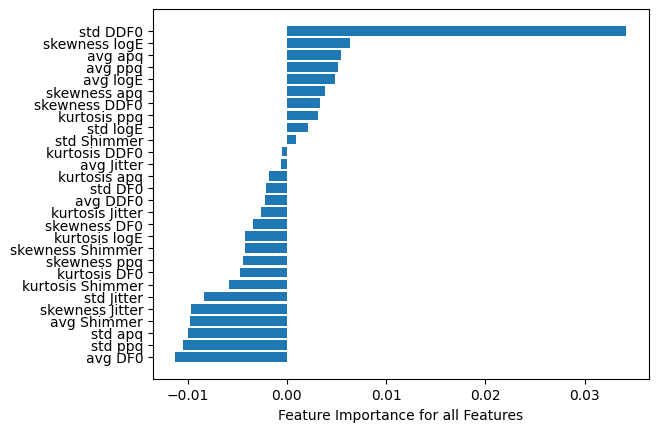

In [58]:
feat_imp_all=permutation_importance(SVM_model,X_test,Y_test)
sorted_importance_all=feat_imp_all.importances_mean.argsort()
f=features[sorted_importance_all]
v=feat_imp_all.importances_mean[sorted_importance_all]
plt.barh(f,v)
plt.xlabel("Feature Importance for all Features")

In [59]:
def feat_imp_all():
    i=0
    x=[]
    for i in range (0,28):
        if v[i] <-0.005 or v[i]>0.005:
            x.append(f[i])
    return x

In [60]:
imp_features_all=feat_imp_all()
print(type(imp_features_all))

<class 'list'>


In [61]:
print("no.of important features= ",len(imp_features_all))
print('                 ')
print('*****************')
print(imp_features_all)

no.of important features=  11
                 
*****************
['avg DF0', 'std ppq', 'std apq', 'avg Shimmer', 'skewness Jitter', 'std Jitter', 'kurtosis Shimmer', 'avg ppq', 'avg apq', 'skewness logE', 'std DDF0']
